In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
data = open('Москва_2021.txt', 'r')
data_text = data.read()

In [2]:
array = data_text.split("\n")
n = len(array)
array = sorted(array)

In [3]:
stat_ryad = {}
for i in array:
  if int(i) not in stat_ryad:
    stat_ryad[int(i)] = 1
  else:
    stat_ryad[int(i)]+=1
print(stat_ryad)

{14: 49, 15: 53, 16: 236, 17: 126, 18: 806, 19: 971, 20: 910, 21: 716, 22: 944, 23: 1071, 24: 810, 25: 1050, 26: 980, 27: 1263, 28: 1113, 29: 1340, 30: 734, 31: 1115, 32: 796, 33: 758, 34: 869, 35: 676, 36: 1198, 37: 522, 38: 1006, 39: 695, 40: 723, 41: 837, 42: 978, 43: 820, 44: 1032, 45: 690, 46: 677, 47: 831, 48: 1026, 49: 1060, 50: 150, 51: 188, 52: 193, 53: 47, 54: 26, 55: 62, 56: 76, 57: 136, 58: 262, 59: 74, 60: 266, 61: 226, 62: 139, 63: 183, 64: 189, 65: 79, 66: 188, 67: 128, 69: 202, 70: 26, 71: 85, 73: 17}


# ЛР5

In [4]:
import matplotlib.pyplot as plt
import scipy.stats as sps

In [5]:
n

32423

In [6]:
x = list(stat_ryad.keys())
y = list(stat_ryad.values())
print(x)
print(y)

[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 73]
[49, 53, 236, 126, 806, 971, 910, 716, 944, 1071, 810, 1050, 980, 1263, 1113, 1340, 734, 1115, 796, 758, 869, 676, 1198, 522, 1006, 695, 723, 837, 978, 820, 1032, 690, 677, 831, 1026, 1060, 150, 188, 193, 47, 26, 62, 76, 136, 262, 74, 266, 226, 139, 183, 189, 79, 188, 128, 202, 26, 85, 17]


In [7]:
x1, y1, xn, yn = x[0], y[0], x[-1], y[-1]

print("x1 и хn:", x1, xn)
print("y1 и yn:", y1, yn)

xs = [(x1+xn)/2, (x1*xn)**0.5, (2*x1*xn)/(x1+xn)]
ys = [(y1+yn)/2, (y1*yn)**0.5, (2*y1*yn)/(y1+yn)]
for i in range(3):
  xs[i]=round(xs[i],1)
  ys[i]=round(ys[i],1)
i_s = []
for i in xs:
  if i not in x:
    for j in range(len(x)):
      if i>x[j] and i<x[j+1]:
        i_s.append(j)
        break
  else:
    i_s.append(x.index(i))

ys_s = []
f = 0
for i in i_s:
  ys_s.append(round(y[i] + (y[i+1]-y[i])/(x[i+1]-x[i])*(xs[f]-x[i]),2))
  f+=1
print(*xs)
print(*ys)
print(*ys_s)

x1 и хn: 14 73
y1 и yn: 49 17
43.5 32.0 23.5
33.0 28.9 25.2
926.0 796.0 940.5


In [8]:
fs = [[xs[0], ys[0], ys_s[0], 0, 0],
      [xs[1], ys[1], ys_s[1], 0, 0],
      [xs[0], ys[1], ys_s[0], 0, 0],
      [xs[2], ys[0], ys_s[2], 0, 0],
      [xs[0], ys[2], ys_s[0], 0, 0],
      [xs[2], ys[2], ys_s[2], 0, 0],
      [xs[1], ys[0], ys_s[1], 0, 0]]

for i in fs:
  i[3] = abs(i[2]-i[1])
  i[4] = round(i[3]/sum(y)*100,2)

print(fs)
min_ds = 100
ind = []
for i in fs:
  if i[4]<min_ds:
    min_ds = i[4]
    ind = i
print(min_ds)
print(ind, "функция: a*ln(x) + b")


[[43.5, 33.0, 926.0, 893.0, 2.75], [32.0, 28.9, 796.0, 767.1, 2.37], [43.5, 28.9, 926.0, 897.1, 2.77], [23.5, 33.0, 940.5, 907.5, 2.8], [43.5, 25.2, 926.0, 900.8, 2.78], [23.5, 25.2, 940.5, 915.3, 2.82], [32.0, 33.0, 796.0, 763.0, 2.35]]
2.35
[32.0, 33.0, 796.0, 763.0, 2.35] функция: a*ln(x) + b


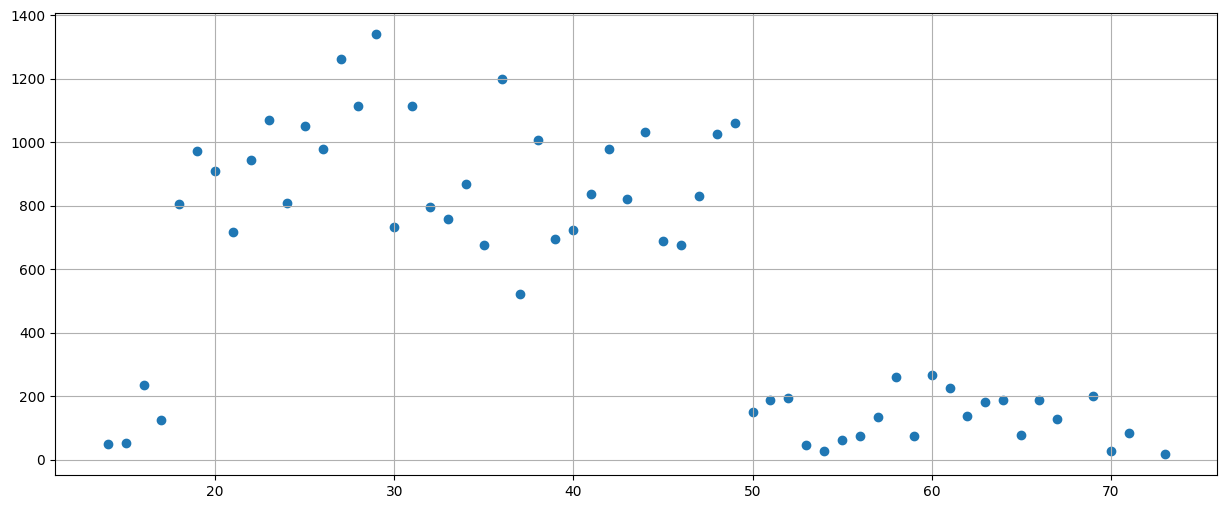

In [9]:
plt.figure(figsize=(15,6))
plt.scatter(x, y)
plt.grid(visible=True)

plt.show()

In [10]:
x_extra = []
for i in range (x[0],x[-1]+1):
  if i not in x:
    x_extra.append(i)

In [11]:
y_extra = []
for i in x_extra:
  y_extra.append(round(y[x.index(i-1)] + (y[x.index(i-1)]-y[x.index(i-1)])/(i+1-(i-1))*(xs[0]-(i-1)),2))

print(x_extra)
print(y_extra)

[68, 72]
[128.0, 85.0]


In [12]:
x.insert(x.index(x_extra[0]-1)+1, x_extra[0])
x.insert(x.index(x_extra[1]-1)+1, x_extra[1])

y.insert(x.index(x_extra[0]), y_extra[0])
y.insert(x.index(x_extra[1]), y_extra[1])


In [ ]:
dy1 = []
for i in range(1,len(y)):
  dy1.append(abs(y[i]- y[i-1]))
max(dy1)/sum(y)*100

2.7883319034195364

In [ ]:
k = max(dy1)/sum(y)*100
nk=1
while k>2:
  dyy = []
  for i in range(1,len(dy1)):
    dyy.append(abs(dy1[i]- dy1[i-1]))
  dy1 = dyy.copy()
  nk +=1
  k = max(dy1)/sum(y)*100
nk

5

Значит, показатель степени аппроксимирующего многочлена, соответствующий максимальному значению ряда разностей, не превышающему 2% от суммы частот - {nk}

# ЛР6

## Задания 1-2

In [14]:
import numpy as np
import pandas as pd

In [41]:
# Данные из таблицы
data = [
    [4922.4, 23369, 1865.9, 24951.2, 12.7, 669.4, 2404.8],
    [4130.7, 26629, 1807.9, 14648.1, 10.7, 644.1, 2302.2],
    [4137.4, 29792, 1749.5, 39558.7, 10.8, 668.0, 2206.2],
    [3889.4, 32495, 1690.0, 32365.0, 11.3, 693.7, 2190.6],
    [4263.9, 34030, 1577.0, 46568.8, 13.4, 611.6, 2388.5],
    [4243.5, 36709, 1444.5, 27929.6, 13.2, 608.3, 2160.1],
    [3966.5, 39167, 1304.6, 37218.5, 12.9, 611.4, 2058.5],
    [3657.0, 43724, 1208.6, 51418.1, 12.6, 583.9, 1991.5],
    [3461.2, 47867, 1126.7, 116166.5, 12.3, 620.7, 2024.3],
    [4316.0, 51344, 1102.8, 126304.8, 12.1, 564.7, 2044.2],
    [3624.6, 57244, 1077.7, 159875.4, 11.0, 644.2, 2004.4]
]

# Названия столбцов
columns = ["x1", "x2", "x3", "x4", "x5", "x6", "y"]

# Создание DataFrame
df = pd.DataFrame(data, columns=columns, index = np.arange(2011, 2022))

In [42]:
df

,x1,x2,x3,x4,x5,x6,y
2011,4922.4,23369,1865.9,24951.2,12.7,669.4,2404.8
2012,4130.7,26629,1807.9,14648.1,10.7,644.1,2302.2
2013,4137.4,29792,1749.5,39558.7,10.8,668.0,2206.2
2014,3889.4,32495,1690.0,32365.0,11.3,693.7,2190.6
2015,4263.9,34030,1577.0,46568.8,13.4,611.6,2388.5
2016,4243.5,36709,1444.5,27929.6,13.2,608.3,2160.1
2017,3966.5,39167,1304.6,37218.5,12.9,611.4,2058.5
2018,3657.0,43724,1208.6,51418.1,12.6,583.9,1991.5
2019,3461.2,47867,1126.7,116166.5,12.3,620.7,2024.3
2020,4316.0,51344,1102.8,126304.8,12.1,564.7,2044.2


Модель имеет структуру 𝑦̂ = 𝜃0 + 𝜃1𝑥1 + 𝜃2𝑥2 + 𝜃3𝑥3 + 𝜃4𝑥4 + 𝜃5𝑥5 + 𝜃6𝑥6

In [43]:
C = df[["x1", "x2", "x3", "x4", "x5", "x6"]]

In [44]:
C['q'] = [1]*11

In [45]:
C

,x1,x2,x3,x4,x5,x6,q
2011,4922.4,23369,1865.9,24951.2,12.7,669.4,1
2012,4130.7,26629,1807.9,14648.1,10.7,644.1,1
2013,4137.4,29792,1749.5,39558.7,10.8,668.0,1
2014,3889.4,32495,1690.0,32365.0,11.3,693.7,1
2015,4263.9,34030,1577.0,46568.8,13.4,611.6,1
2016,4243.5,36709,1444.5,27929.6,13.2,608.3,1
2017,3966.5,39167,1304.6,37218.5,12.9,611.4,1
2018,3657.0,43724,1208.6,51418.1,12.6,583.9,1
2019,3461.2,47867,1126.7,116166.5,12.3,620.7,1
2020,4316.0,51344,1102.8,126304.8,12.1,564.7,1


In [46]:
C = C.reindex(columns=['q', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']).to_numpy()
C

array([[1.000000e+00, 4.922400e+03, 2.336900e+04, 1.865900e+03,
        2.495120e+04, 1.270000e+01, 6.694000e+02],
       [1.000000e+00, 4.130700e+03, 2.662900e+04, 1.807900e+03,
        1.464810e+04, 1.070000e+01, 6.441000e+02],
       [1.000000e+00, 4.137400e+03, 2.979200e+04, 1.749500e+03,
        3.955870e+04, 1.080000e+01, 6.680000e+02],
       [1.000000e+00, 3.889400e+03, 3.249500e+04, 1.690000e+03,
        3.236500e+04, 1.130000e+01, 6.937000e+02],
       [1.000000e+00, 4.263900e+03, 3.403000e+04, 1.577000e+03,
        4.656880e+04, 1.340000e+01, 6.116000e+02],
       [1.000000e+00, 4.243500e+03, 3.670900e+04, 1.444500e+03,
        2.792960e+04, 1.320000e+01, 6.083000e+02],
       [1.000000e+00, 3.966500e+03, 3.916700e+04, 1.304600e+03,
        3.721850e+04, 1.290000e+01, 6.114000e+02],
       [1.000000e+00, 3.657000e+03, 4.372400e+04, 1.208600e+03,
        5.141810e+04, 1.260000e+01, 5.839000e+02],
       [1.000000e+00, 3.461200e+03, 4.786700e+04, 1.126700e+03,
        1.161665

In [47]:
y = df['y'].to_numpy()
y

array([2404.8, 2302.2, 2206.2, 2190.6, 2388.5, 2160.1, 2058.5, 1991.5,
       2024.3, 2044.2, 2004.4])

𝜽 ̂МНК = (𝑪^𝑻𝑪)^(−𝟏)𝑪^𝑻𝒚  

In [59]:
Q = (np.linalg.inv((C.T).dot(C)).dot(C.T)).dot(y)
Q

array([ 6.68691295e+01, -8.18896748e-02,  8.72128812e-03,  1.30639160e+00,
        2.34638731e-03,  8.63881753e+01, -1.57694240e+00])

In [60]:
print(f'𝑦̂ = {Q[0]} + {Q[1]}𝑥1 + {Q[2]}𝑥2 + {Q[3]}𝑥3 + {Q[4]}x4 + {Q[5]}𝑥5 + {Q[6]}𝑥6')

𝑦̂ = 66.86912949393991 + -0.08188967480824665𝑥1 + 0.0087212881212618𝑥2 + 1.306391602063277𝑥3 + 0.002346387305300998x4 + 86.38817525780158𝑥5 + -1.5769424008806137𝑥6


In [61]:
def f(x1, x2, x3, x4, x5, x6):
  return Q[0] + Q[1]*𝑥1 + Q[2]*𝑥2 + Q[3]*𝑥3 + Q[4]*x4 + Q[5]*𝑥5 + Q[6]*𝑥6

In [62]:
y_pred = []
for index, row in df.iterrows():
  y_pred.append(f(row['x1'], row['x2'], row['x3'], row['x4'], row['x5'], row['x6']))

y_pred = pd.Series(y_pred, index = np.arange(2011, 2022))
y_pred

,0
2011,2405.249028
2012,2265.686999
2013,2245.830313
2014,2197.769755
2015,2377.076754
2016,2173.206239
2017,2025.552803
2018,2015.994198
2019,2029.143912
2020,2053.065295


In [63]:
ost = (df['y'] - y_pred).to_numpy()
ost

array([ -0.44902817,  36.51300075, -39.63031295,  -7.16975534,
        11.42324648, -13.1062391 ,  32.94719689, -24.49419826,
        -4.84391194,  -8.86529524,  17.67529688])

In [64]:
otkl = (df['y'] - df['y'].mean()).to_numpy()
otkl

array([ 243.40909091,  140.80909091,   44.80909091,   29.20909091,
        227.10909091,   -1.29090909, -102.89090909, -169.89090909,
       -137.09090909, -117.19090909, -156.99090909])

In [65]:
R2 = 1 - ((ost.T).dot(ost))/((otkl.T).dot(otkl))
R2

0.9767202712600238

## Задание 3

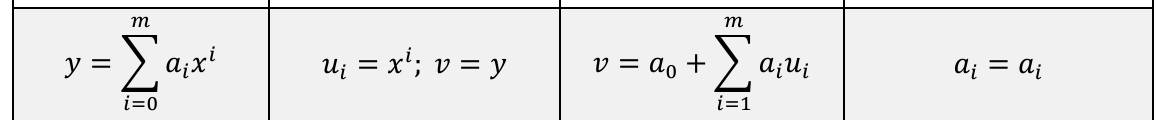

y= a0 + a1*x + a2*x^2 + a3*x^3


v = a0 + a1*u1 + a2*u2 + a3*u3

In [29]:
a = pd.DataFrame(list(stat_ryad.items()), columns = ['x', 'y'])
a['x^2'] = a['x']**2
a['x^3'] = a['x']**3
a['a0'] = [1]*58
y_gen = a['y']

In [30]:
C_1 = a.reindex(columns=['a0','x','x^2','x^3']).to_numpy()

In [31]:
C_1

array([[     1,     14,    196,   2744],
       [     1,     15,    225,   3375],
       [     1,     16,    256,   4096],
       [     1,     17,    289,   4913],
       [     1,     18,    324,   5832],
       [     1,     19,    361,   6859],
       [     1,     20,    400,   8000],
       [     1,     21,    441,   9261],
       [     1,     22,    484,  10648],
       [     1,     23,    529,  12167],
       [     1,     24,    576,  13824],
       [     1,     25,    625,  15625],
       [     1,     26,    676,  17576],
       [     1,     27,    729,  19683],
       [     1,     28,    784,  21952],
       [     1,     29,    841,  24389],
       [     1,     30,    900,  27000],
       [     1,     31,    961,  29791],
       [     1,     32,   1024,  32768],
       [     1,     33,   1089,  35937],
       [     1,     34,   1156,  39304],
       [     1,     35,   1225,  42875],
       [     1,     36,   1296,  46656],
       [     1,     37,   1369,  50653],
       [     1, 

In [32]:
A = np.round((np.linalg.inv((C_1.T).dot(C_1)).dot(C_1.T)).dot(y_gen),4)
A

array([-2.6299995e+03,  2.8364240e+02, -6.7901000e+00,  4.7100000e-02])

In [33]:
print(f'𝑦 = {A[0]} + {A[1]}𝑥^1 + {A[2]}𝑥^2 + {A[3]}𝑥^3')

𝑦 = -2629.9995 + 283.6424𝑥^1 + -6.7901𝑥^2 + 0.0471𝑥^3


In [34]:
def f1(x1, x2, x3):
  return A[0] + A[1]*𝑥1 + A[2]*𝑥2 + A[3]*𝑥3

In [35]:
y_pred_ = []
for index, row in a.iterrows():
  y_pred_.append(f1(row['x'], row['x^2'], row['x^3']))

y_pred_ = pd.Series(y_pred_, index = a.index)
y_pred_

,0
0,139.3769
1,255.8265
2,362.9349
3,460.9847
4,550.2585
5,631.0389
6,703.6085
7,768.2499
8,825.2457
9,874.8785


In [36]:
ost_ = (y_gen - y_pred_).to_numpy()
ost_

array([ -90.3769, -202.8265, -126.9349, -334.9847,  255.7415,  339.9611,
        206.3915,  -52.2499,  118.7543,  196.1215, -107.4309,   96.8145,
         -2.4249,  257.5683,   90.5115,  306.1221, -305.8825,   74.2151,
       -240.8677, -270.4135, -146.7049, -323.0245,  219.3451, -432.8787,
         78.0215, -203.2369, -142.9365,    5.6401,  183.2103,   63.4915,
        315.2011,   14.0565,   42.7751,  239.0743,  476.6715,  553.2841,
       -314.3705, -234.5749, -188.6117, -294.7635, -277.3129, -204.5425,
       -155.7349,  -63.1727,   92.8615,  -67.9149,  148.2155,  128.9701,
         59.0663,  116.2215,  131.1531,   25.5785,  134.2151,   68.7803,
        115.5661,  -82.7785,  -52.3249, -197.1535])

In [55]:
otkl_ = (y_gen - y_pred_.mean()).to_numpy()
otkl_

array([-509.37635862, -505.37635862, -322.37635862, -432.37635862,
        247.62364138,  412.62364138,  351.62364138,  157.62364138,
        385.62364138,  512.62364138,  251.62364138,  491.62364138,
        421.62364138,  704.62364138,  554.62364138,  781.62364138,
        175.62364138,  556.62364138,  237.62364138,  199.62364138,
        310.62364138,  117.62364138,  639.62364138,  -36.37635862,
        447.62364138,  136.62364138,  164.62364138,  278.62364138,
        419.62364138,  261.62364138,  473.62364138,  131.62364138,
        118.62364138,  272.62364138,  467.62364138,  501.62364138,
       -408.37635862, -370.37635862, -365.37635862, -511.37635862,
       -532.37635862, -496.37635862, -482.37635862, -422.37635862,
       -296.37635862, -484.37635862, -292.37635862, -332.37635862,
       -419.37635862, -375.37635862, -369.37635862, -479.37635862,
       -370.37635862, -430.37635862, -356.37635862, -532.37635862,
       -473.37635862, -541.37635862])

In [56]:
R2_ = 1 - ((ost_.T).dot(ost_))/((otkl_.T).dot(otkl_))
R2_

0.7347752442327304